## Этапы жизненного цикла модели для создания ИИ-сомелье

0. Формулировка задачи:
   Создать ИИ-сомелье (прогностическую модель) по оценки вин вслепую. Данная модель будет выставлять рейтинг вину.

1. Сбор данных: 
   В качестве источника данных мы используем интернет ресурс WineEnthusiast, делаем его парсинг для максимального сбора данных в наш датасет (как итог 129971 записей разного качества).

2. Очистка данных:
    Оцениваем полученные данные и проводим очистку от пустых значений или заменяем их на другие значения, выявляем аномалии в данных, выбросы. Кроме того, категориальные признаки (ввиде строк) пытаемся превратить в признаки (в виде чисел) для нашей будущей модели.

3. Разведывательный анализ данных:
    Ключевым признаком в нашем дата-сете является рейтинг вина. Скорее всего ему стоит уделить наибольшее внимание. Так же важными признаками при постановки рейтинга являются цена.

4. Разработка и построение модели (EDA):
    Кодирование категориальных признаков (например, страны происхождения вина).

5. Внедрение модели в продакшен:
    Внедрение модели в продуктивную среду для предоставления рекомендаций. Мониторинг работы модели и обновление при необходимости.

## Подробный процесс разведывательного анализа данных (EDA)

1. Изучение структуры данных, которая включает в себя:   

    1.1 Просмотр первых и последний строк (df.head(5) df.tail(5));
    
    1.2 Структура данных (df.info());
    
    1.3 Основные статистические характеристики о дата-сете (df.describe())

2. Обработка пропущенных значений:

    2.1 Обнаружение пропусков (df.isnull().sum());
    
    2.2 Стратегии обработки пропусков(удаление пропущенных значений, если в данных больше 40 процентов пропусков, замена числовых значений средним, или модой и т.д.)

3. Анализ распределения данных

    3.1 Гистограмма распределения числовых признаков (df['price'].hist() df['points'].hist());
    
    3.2 Столбчатая диаграмма распредения категориальных признаков

4. Визуализация данных 

    4.1 Тепловые карты;
    
    4.2 Коробчатые диаграммы

5. Выявление и анализ выбросов

    5.1 Коробчатые диаграммы
    
    5.2 Межквартильный размах (IQR)

6. Анализ взаимосвязей между признаками

    6.1 Парные диаграммы;
    
    6.2 Сводные таблицы

7. Подготовка отчета

Признаки дата-сета:

* country — страна-производитель вина.

* description — подробное описание.

* designation — название виноградника, где выращивают виноград для вина.

* points — баллы, которыми WineEnthusiast оценил вино по шкале от 1 до 100.

* price — стоимость бутылки вина.

* province — провинция или штат.

* region_1 — винодельческий район в провинции или штате (например Напа).

* region_2 — конкретный регион. Иногда в пределах винодельческой зоны указываются более конкретные регионы (например Резерфорд в долине Напа), но это значение может быть пустым.

* taster_name — имя сомелье.

* taster_twitter_handle — твиттер сомелье.

* title — название вина, которое часто содержит год и другую подробную информацию.

* variety — сорт винограда, из которого изготовлено вино (например Пино Нуар).

* winery — винодельня, которая производила вино.

In [2]:
import pandas as pd
import seaborn as sns
import statistics # библиотека для статистических расчетов
import matplotlib.pyplot as plt
from scipy import stats # библиотека для расчетов
from sklearn.metrics import matthews_corrcoef # отдельная библиотека в которой есть корреляция Мэтьюса

# !Данная библиотека используется только для того, чтобы не выводить разные предупреждения и не используется для расчетов!
import warnings
warnings.filterwarnings('ignore')

In [3]:
wine_df = pd.read_csv('Data/wine.csv', sep=',')
display(wine_df.head(5))
display()
display(wine_df.tail(5))

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss
129970,France,"Big, rich and off-dry, this is powered by inte...",Lieu-dit Harth Cuvée Caroline,90,21.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...,Gewürztraminer,Domaine Schoffit


In [4]:
tasters_count = wine_df['taster_name'].nunique()
display(f'Количество сомелье: {tasters_count}')

max_bottle_price = wine_df['price'].max()
display(f'Максимальная цена за бутылку: {round(max_bottle_price)}')

'Количество сомелье: 19'

'Максимальная цена за бутылку: 3300'

In [5]:
display(f'Структура данных')
wine_df.info()

'Структура данных'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [6]:
display(f'Основные статистические данные')
wine_df.describe()

'Основные статистические данные'

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


In [7]:
display('Уникальные признаки')
wine_df.nunique()

'Уникальные признаки'

country                      43
description              119955
designation               37979
points                       21
price                       390
province                    425
region_1                   1229
region_2                     17
taster_name                  19
taster_twitter_handle        15
title                    118840
variety                     707
winery                    16757
dtype: int64

array([[<Axes: title={'center': 'points'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

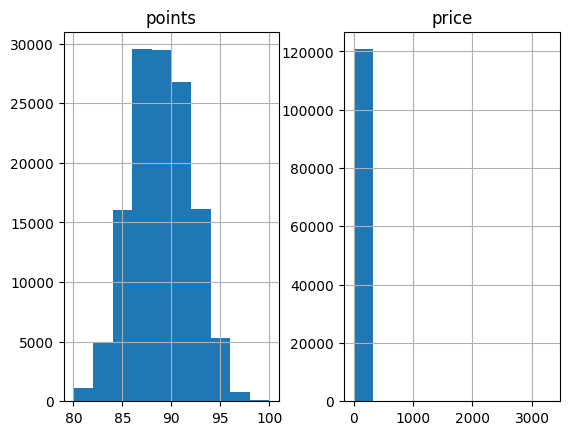

In [8]:
# Основные числовые признаки это
hist = wine_df.hist()
display(hist)

<Axes: xlabel='country'>

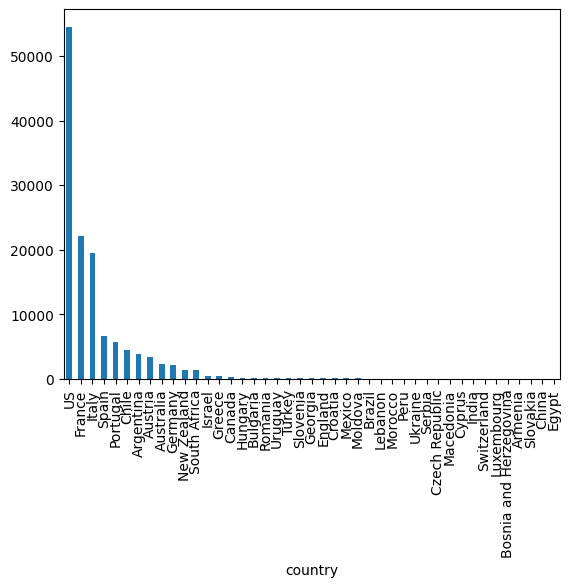

In [9]:
# Основные категориальные признаки это
wine_df['country'].value_counts().plot(kind='bar')

In [10]:
# Считает дубликаты
mask = wine_df.duplicated()
duplicates = wine_df[mask]
display(f'Число найденных полных дубликатов (до удаления): {duplicates.shape[0]}')

# Удаляем дубликаты
wine_df = wine_df.drop_duplicates()

# Проверяем дубликаты после удаления
mask = wine_df.duplicated()
duplicates = wine_df[mask]
display(f'Число найденных полных дубликатов (после удаления): {duplicates.shape[0]}')

'Число найденных полных дубликатов (до удаления): 9983'

'Число найденных полных дубликатов (после удаления): 0'

In [11]:
# Число пропусков в столбцах
null_data = wine_df.isnull().sum()
print(f'Число пропусков: {null_data[null_data > 0]}')

Число пропусков: country                     59
designation              34545
price                     8395
province                    59
region_1                 19560
region_2                 73219
taster_name              24917
taster_twitter_handle    29446
variety                      1
dtype: int64


<Axes: >

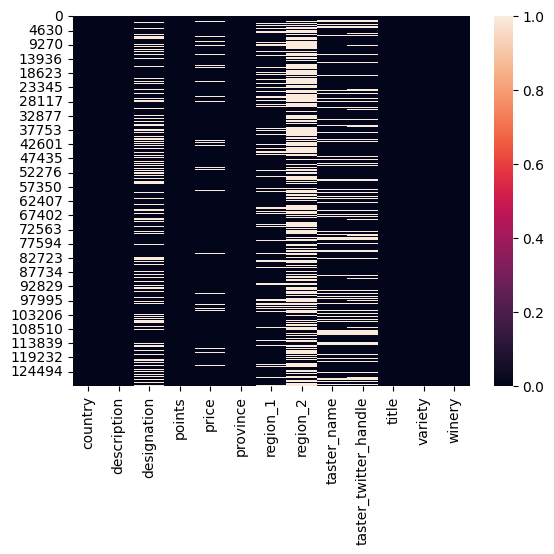

In [12]:
# Карта пропуской
sns.heatmap(wine_df.isnull())

In [13]:
# Удаляем признак region_2 т.к. он представляет более 60% пропусков и не имеет ценности
wine_df = wine_df.drop(['region_2'], axis=1)

In [14]:
# Заменяем пропущенные значения в категориальных признаках на unknown
wine_df['designation'] = wine_df['designation'].fillna('unknown')
wine_df['region_1'] = wine_df['region_1'].fillna('unknown')
wine_df['taster_name'] = wine_df['taster_name'].fillna('unknown')
wine_df['taster_twitter_handle'] = wine_df['taster_twitter_handle'].fillna('unknown')

In [15]:
# Признаки с наименьшим количеством пропусков заменяем на частовречающиеся значения
wine_df['country'] = wine_df['country'].fillna('US')
wine_df['province'] = wine_df['province'].fillna('California')
wine_df['variety'] = wine_df['variety'].fillna('Pinot Noir')

In [16]:
# Признак с наименьшим количеством пропусков заменяем на среднее значение
wine_df['price'] = wine_df['price'].fillna(wine_df['price'].mean())

Можно провести над данными другие виды манипуляций, например удалить те столбцы у которых более 30% пропусков.

In [17]:
# # Задаем порог в 70 % (0.7), т.е удаляем столбцы в которых более 30 процентов пропусков! 
# thresh = wine_df.shape[0] * 0.7
# # Axis = 1 удаляем столбцы
# wine_df = wine_df.dropna(thresh=thresh, axis=1)
# # Axis = 0 удаляем оставшиеся строки
# wine_df = wine_df.dropna(how='any', axis=0)

# # Число пропусков в столбцах
# null_data = wine_df.isnull().sum()
# print(f'Число пропусков: {null_data[null_data > 0]}')

In [18]:
# сохраняем очищенный датасет для дальнейшей работы
# wine_df.to_csv('Data/wine_cleared.csv', index=True)

In [19]:
# Далее получение данных из очищенного дата-сета
wine_df_cleared = pd.read_csv('Data/wine_cleared.csv')

In [20]:
# Одномерный анализ признака баллы (минимум)
min = wine_df_cleared['points'].min()
display(f'Наименьший балл за вино: {min}')

'Наименьший балл за вино: 80'

In [21]:
# Минимум цены за бутылку
min = wine_df_cleared['price'].min()
display(f'Наименьшая цена за бутылку: {min}')

'Наименьшая цена за бутылку: 4.0'

In [22]:
# Вычисляем среднее арифмитическое с помощью библиотеки statistics (средняя стоимость бутылки вина)
mean = statistics.mean(wine_df_cleared['price'])
display(f'Средняя стоимость бутылки вина: {round(mean, 2)}')

# Вычисляем среднее арифметическое с помощью обычных способов
mean_custom= sum(wine_df_cleared['price']) / len(wine_df_cleared['price'])
display(f'Средняя стоимость бутылки вина (стандартными методами): {round(mean_custom, 2)}')

'Средняя стоимость бутылки вина: 35.36'

'Средняя стоимость бутылки вина (стандартными методами): 35.36'

In [23]:
# Вычисляем медиану с помощью библиотеки statistics (медиана стоимости бутылки вина)
median = statistics.median(wine_df_cleared['price'])
display(f'Медиана стоимости бутылки вина: {median}')

# Вычисляем медиану с помощью обычных способов
count_val = len(wine_df_cleared['price']) # количество записей цен
sorted_val = sorted(wine_df_cleared['price']) # отсортированные цены
mid_index = count_val // 2 # средний элемент отсортированного списка

if count_val % 2: # при нечетном кол-ве элементов выбираем средний по индексу
    median_val = sorted_val[mid_index]
else: # при четном кол-ве элементов выбираем 2 средних по индексу и считаем между ними среднее арифметическое
    median_val = (sorted_val[mid_index-1] + sorted_val[mid_index]) // 2
display(median_val)

'Медиана стоимости бутылки вина: 28.0'

28.0

In [24]:
# Вычисляем моду с помощью библиотеки statistics (мода стоимости бутылки вина)
mode = statistics.mode(wine_df_cleared['price'])
display(f'Мода стоимости бутылки вина: {round(mode, 2)}')

# Вычисляем моду с помощью библиотеки statistics (мода стоимости бутылки вина)
multi_mode = statistics.multimode(wine_df_cleared['price'])
display(f'Мода (мультимода) стоимости бутылки вина: {multi_mode}')

'Мода стоимости бутылки вина: 35.36'

'Мода (мультимода) стоимости бутылки вина: [35.363389129985535]'

In [25]:
from collections import Counter

# Вычисляем моду с помощью обычных способов
def find_mode(data):
    data = list(data)
    if not data: # Если получили пустое значение
        return None
    # Используем библиотеку Counter для подсчета
    data_count = Counter(data)
    # Находим максимальные значения в Counter
    max_count = max(data_count.values()) 
    # Находим моду если при переборе получаем значние из списка максимальных
    mode = [key for key, val in data_count.items() if val == max_count]
    # Возвращаем моду если длинна списка больше 1
    return mode if len(mode) > 1 else mode[0]
    
mode_custom_1 = find_mode(wine_df_cleared['price'])
display(f'Мода стоимости бутылки вина (с помощью кастомного метода): {round(mode_custom_1, 2)}')

mode_сustom_2 = round(wine_df_cleared['price'].value_counts().index[0], 2)
display(f'Мода стоимости бутылки вина (с помощью кастомного метода): {round(mode_сustom_2, 2)}')

'Мода стоимости бутылки вина (с помощью кастомного метода): 35.36'

'Мода стоимости бутылки вина (с помощью кастомного метода): 35.36'

In [26]:
# Получаем коэффициент корриляции признаков в нашем дата-сете

# Отфильтровываем только числовые признаки
numeric_wine_df = wine_df_cleared.select_dtypes(include=['number'])

correlation_matrix = numeric_wine_df[['price', 'points']].corr()

display(correlation_matrix)
# Корреляция между ценой за бутылку и баллами за вино, округляем ответ до шести знаков после запятой.
display(f'Коэффициент корреляци между ценой за бутылку и баллами за вино: {round(correlation_matrix.loc['price', 'points'], 6)}')

,price,points
price,1.000000,0.402137
points,0.402137,1.000000


'Коэффициент корреляци между ценой за бутылку и баллами за вино: 0.402137'

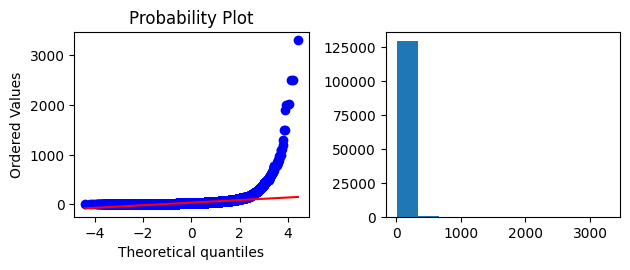

In [27]:
# Построим график qq plot
plt.subplot(2, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(wine_df_cleared['price'], plot=plt)

# Построим график гистограмму
plt.subplot(2, 2, 2)
plt.hist(wine_df_cleared['price'])

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout
plt.show() # просмотр графика

Такой признак при анализе Пирсоном (установлен по умолчанию) может выдать некорректные результаты. Для таких случаев существуют другие виды корреляций или проводится операция по приведению признака к нормальному путём преобразований.

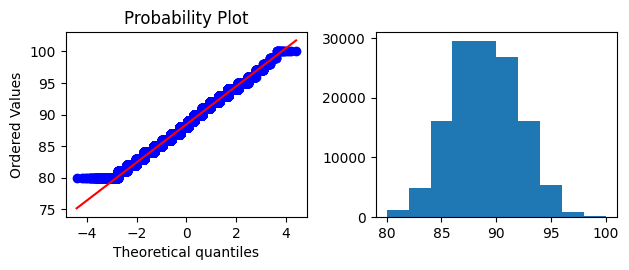

In [28]:
# Построим график qq plot
plt.subplot(2, 2, 1) # задаем сетку рисунка количество строк и столбцов
stats.probplot(wine_df_cleared['points'], plot=plt)

# Построим график гистограмму
plt.subplot(2, 2, 2)
plt.hist(wine_df_cleared['points'])

plt.tight_layout() # чтобы графики не наезжали другу на друга, используем tight_layout
plt.show() # просмотр графика

In [29]:
# Корреляция Спирмена для price и points
spearman_corr_matrix = wine_df_cleared[['price', 'points']].corr(method='spearman', numeric_only=True)
print(f'Коэффициент корреляци Спирмена между ценой за бутылку и баллами за вино: \n{round(spearman_corr_matrix, 2)}')

Коэффициент корреляци Спирмена между ценой за бутылку и баллами за вино: 
        price  points
price    1.00    0.58
points   0.58    1.00


Примечание: Обычно корреляция по Спирмену используется для категориальных признаков, НО иногда мы можем применить ранговую корреляцию и для числовых переменных, которые распределены **ненормально или если между ними существует нелинейная связь**. 

In [30]:
# Корреляция Кендала для price и points
kendall_corr_matrix = wine_df_cleared[['price', 'points']].corr(method='kendall', numeric_only=True)
print(f'Коэффициент корреляци Кендала между ценой за бутылку и баллами за вино: \n{round(kendall_corr_matrix, 2)}')

Коэффициент корреляци Кендала между ценой за бутылку и баллами за вино: 
        price  points
price    1.00    0.43
points   0.43    1.00


В нашем случае корреляционный анализ показал нам явную связь цены за бутылку вина с её рейтингом. Она не является такой сильной связью, чтобы вызывать мультиколлинеарность. Также мы по-прежнему не можем сказать, что цена и рейтинг связаны напрямую, ведь корреляция не даёт нам причинно-следственных связей. Возможно, есть третья переменная, влияющая на эти оба признака.

В нашем датасете винных обзоров нет бинарных переменных, но мы можем воспользоваться примером.

In [31]:
# Пример. Создадим два случайных признака x, y и зададим им бинарные значения.
x = [+1, -1, +1, +1] # список значений признака х
y = [+1, +1, +1, -1] # список значений признака y

matthews_corr = matthews_corrcoef(x, y) # рассчитаем коэффициент корреляции Мэтьюса
display(f'Учебный пример корреляции по Мэтьюсу: {round(matthews_corr, 2)}')

'Учебный пример корреляции по Мэтьюсу: -0.33'

Коэффициент корреляции Мэтьюса может быть полезен в случае, когда в датасете представлены только бинарные переменные. Кроме того, этот коэффициент используется для оценки качества моделей, ответы которых также бинарны.